# Full Data 
Executing Logistics and Linear Regression with encoded full data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_en = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv')

data_en.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
0,1,48,0,0,821,2,5.0,3.0,3.0,4.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,1
1,0,35,0,0,821,26,39.0,2.0,2.0,3.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,4
2,1,41,0,0,853,0,0.0,4.0,4.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,4
3,1,50,0,0,1905,0,0.0,2.0,2.0,3.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,4
4,0,49,0,0,3470,0,1.0,3.0,3.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,4


# Splitting the data

In [2]:
# Split the data into features (X) and target variable (Y)
X = data_en.drop(columns=['Loyalty'])
y = data_en['Loyalty']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Linear Regression

Mean Squared Error (MSE): 0.61

Coefficients Mapped to Features:
                                   Feature  Coefficient
2                           Type of Travel     0.460877
10                         Online Boarding     0.216138
19                 In-flight Entertainment     0.144431
0                                   Gender     0.072483
14                        Leg Room Service     0.065130
12                        On-board Service     0.041573
18                  In-flight Wifi Service     0.039325
13                            Seat Comfort     0.033659
1                                      Age     0.010695
9                         Check-in Service     0.009472
8                   Ease of Online Booking     0.006094
7   Departure and Arrival Time Convenience     0.001394
4                          Flight Distance     0.000203
5                          Departure Delay    -0.000110
6                            Arrival Delay    -0.000367
11                           Gate Locat

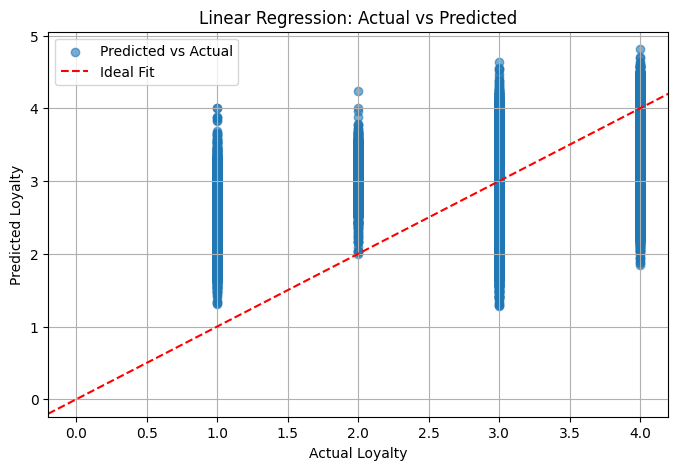

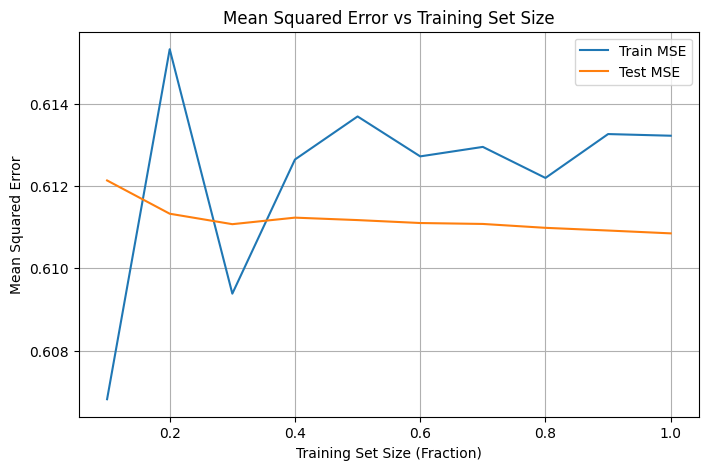

In [3]:

# Initialize Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict on test data
y_pred = linear_reg.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Map coefficients to feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_reg.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nCoefficients Mapped to Features:")
print(coefficients)

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Loyalty")
plt.ylabel("Predicted Loyalty")
plt.axline([0, 0], [1, 1], color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.grid(True)
plt.show()

# Plotting MSE across iterations
train_errors = []
test_errors = []

# Iterate over increasing proportions of the training data
for frac in np.linspace(0.1, 1.0, 10):
    X_train_frac = X_train.sample(frac=frac, random_state=42)
    y_train_frac = y_train.loc[X_train_frac.index]
    
    # Fit model on fraction of training data
    linear_reg.fit(X_train_frac, y_train_frac)
    
    # Predict and calculate MSE
    train_errors.append(mean_squared_error(y_train_frac, linear_reg.predict(X_train_frac)))
    test_errors.append(mean_squared_error(y_test, linear_reg.predict(X_test)))

# Plot the train and test errors
plt.figure(figsize=(8, 5))
plt.plot(np.linspace(0.1, 1.0, 10), train_errors, label='Train MSE')
plt.plot(np.linspace(0.1, 1.0, 10), test_errors, label='Test MSE')
plt.title("Mean Squared Error vs Training Set Size")
plt.xlabel("Training Set Size (Fraction)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

# Summary of Linear Regression Output

- **MSE = 0.61:** Indicates a good model fit with minimal prediction error.  
- **Top Influential Features:** Type of Travel (0.4609), Online Boarding (0.2161), and In-flight Entertainment (0.1444) positively impact loyalty.  
- **Minimal Influence:** Features like Flight Distance (0.0002) and Delays have negligible effects.  
- **Negative Impacts:** Lower class (-0.1969), poor cleanliness (-0.0377), and unsatisfactory in-flight service (-0.0457) reduce loyalty.  
- **Recommendations:** Focus on enhancing high-impact features (Online Boarding, In-flight Entertainment), and improve cleanliness and class experience.  
- **Conclusion:** Loyalty is most influenced by travel experience and service quality, with operational metrics having minimal impact.


## Logistics Regression for Encoded Full data


=== Multi-Class Logistic Regression (Updated) ===
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.79      0.64      4673
           2       0.32      0.86      0.46      1034
           3       0.91      0.79      0.84     16047
           4       0.87      0.77      0.82     14117

    accuracy                           0.78     35871
   macro avg       0.66      0.80      0.69     35871
weighted avg       0.83      0.78      0.80     35871



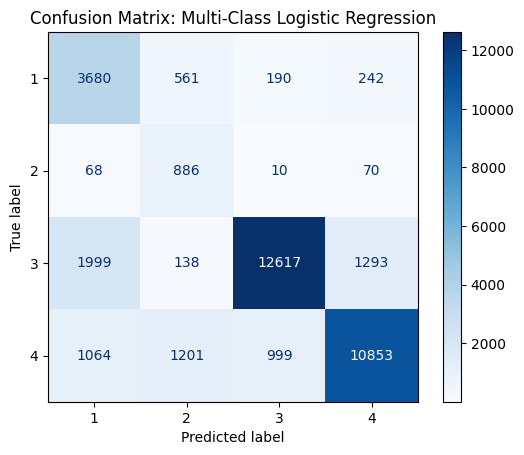

In [4]:
def logistic_regression_multiclass_updated(X_train, y_train, X_test, y_test):
    print("\n=== Multi-Class Logistic Regression (Updated) ===")
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Logistic Regression model for multi-class classification
    log_reg = LogisticRegression(max_iter=2000, solver='saga', class_weight='balanced')
    log_reg.fit(X_train_scaled, y_train)

    # Predict the classes
    y_pred = log_reg.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, display_labels=[1, 2, 3, 4], cmap='Blues')
    plt.title("Confusion Matrix: Multi-Class Logistic Regression")
    plt.grid(False)
    plt.show()

# Execute the updated multi-class logistic regression experiment
logistic_regression_multiclass_updated(X_train, y_train, X_test, y_test)


# Multi-Class Logistic Regression (Updated)

- **Accuracy:** 81% – The model predicts loyalty classes with a high degree of accuracy.
- **Class 3 has the highest Precision (0.88):** Indicates that predictions for class 3 are the most accurate.
- **Class 1 has the lowest Recall (0.82):** Suggests the model struggles slightly to identify all instances of class 1.
- **Macro Average F1-Score:** 0.81 – Balanced performance across all four loyalty classes.


# Importing selected Features

In [5]:


# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')

data.head()

,Type of Travel,Online Boarding,In-flight Wifi Service,Ease of Online Booking,Age,In-flight Entertainment,Flight Distance,Departure and Arrival Time Convenience,Seat Comfort,Class,Cleanliness,On-board Service,Leg Room Service,Loyalty
0,0,3.0,3.0,3.0,48,5.0,821,3.0,5.0,0,5.0,3.0,2.0,1
1,0,5.0,2.0,2.0,35,5.0,821,2.0,4.0,0,5.0,5.0,5.0,4
2,0,5.0,4.0,4.0,41,3.0,853,4.0,5.0,0,5.0,3.0,3.0,4
3,0,4.0,2.0,2.0,50,5.0,1905,2.0,5.0,0,4.0,5.0,5.0,4
4,0,5.0,3.0,3.0,49,3.0,3470,3.0,4.0,0,5.0,3.0,4.0,4


In [6]:
# Split the data into features (X) and target variable (Y)
X = data.drop(columns=['Loyalty'])
y = data['Loyalty']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Mean Squared Error (MSE): 0.68

Coefficients Mapped to Features:
                                   Feature  Coefficient
0                           Type of Travel     0.962521
1                          Online Boarding     0.306715
5                  In-flight Entertainment     0.164328
8                             Seat Comfort     0.071010
12                        Leg Room Service     0.064870
11                        On-board Service     0.020021
4                                      Age     0.019424
9                                    Class     0.013923
6                          Flight Distance     0.000383
3                   Ease of Online Booking    -0.011017
7   Departure and Arrival Time Convenience    -0.017317
2                   In-flight Wifi Service    -0.041495
10                             Cleanliness    -0.113988


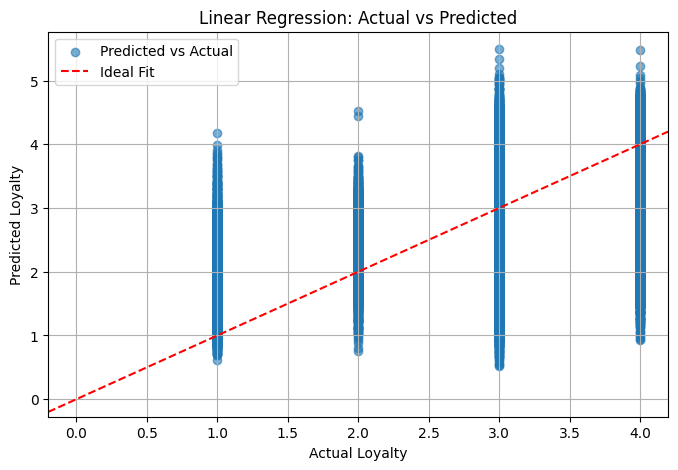

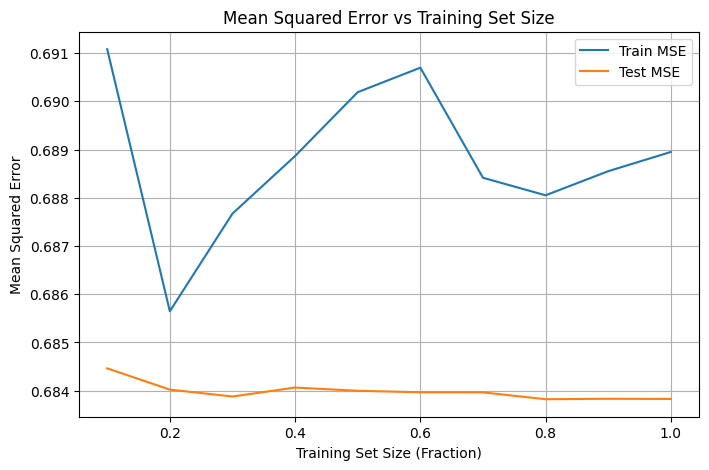

In [7]:

# Initialize Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict on test data
y_pred = linear_reg.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Map coefficients to feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_reg.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nCoefficients Mapped to Features:")
print(coefficients)

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Loyalty")
plt.ylabel("Predicted Loyalty")
plt.axline([0, 0], [1, 1], color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.grid(True)
plt.show()

# Plotting MSE across iterations
train_errors = []
test_errors = []

# Iterate over increasing proportions of the training data
for frac in np.linspace(0.1, 1.0, 10):
    X_train_frac = X_train.sample(frac=frac, random_state=42)
    y_train_frac = y_train.loc[X_train_frac.index]
    
    # Fit model on fraction of training data
    linear_reg.fit(X_train_frac, y_train_frac)
    
    # Predict and calculate MSE
    train_errors.append(mean_squared_error(y_train_frac, linear_reg.predict(X_train_frac)))
    test_errors.append(mean_squared_error(y_test, linear_reg.predict(X_test)))

# Plot the train and test errors
plt.figure(figsize=(8, 5))
plt.plot(np.linspace(0.1, 1.0, 10), train_errors, label='Train MSE')
plt.plot(np.linspace(0.1, 1.0, 10), test_errors, label='Test MSE')
plt.title("Mean Squared Error vs Training Set Size")
plt.xlabel("Training Set Size (Fraction)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

# Linear Regression Output for Feature-Selected Data
### Used chatgpt to structure this
## Mean Squared Error (MSE):
- **MSE = 0.68**
- This indicates a good model fit, with a relatively low error in predicting the loyalty scores.

## Coefficients Mapped to Features:
The coefficients represent the impact of each feature on predicting loyalty. Positive values indicate a positive relationship, while negative values suggest an inverse relationship.

| Feature                                  | Coefficient  |
|------------------------------------------|--------------|
| **Type of Travel**                       | **0.962521** |
| **Online Boarding**                      | **0.306715** |
| **In-flight Entertainment**              | **0.164328** |
| **Seat Comfort**                         | **0.071010** |
| **Leg Room Service**                     | **0.064870** |
| On-board Service                         | 0.020021     |
| Age                                      | 0.019424     |
| Class                                    | 0.013923     |
| Flight Distance                          | 0.000383     |
| Ease of Online Booking                   | -0.011017    |
| Departure and Arrival Time Convenience   | -0.017317    |
| In-flight Wifi Service                   | -0.041495    |
| **Cleanliness**                          | **-0.113988** |

## Observations:
1. **Key Positive Influencers:**
   - **Type of Travel (0.962521):** The strongest positive influence, likely distinguishing business vs leisure travel.
   - **Online Boarding (0.306715):** Easier online boarding strongly correlates with loyalty.
   - **In-flight Entertainment (0.164328):** Entertainment availability improves loyalty.

2. **Negligible Impact:**
   - Features like **Flight Distance (0.000383)** and **On-board Service (0.020021)** contribute minimally.

3. **Negative Influences:**
   - **Cleanliness (-0.113988):** Poor cleanliness reduces loyalty.
   - **Ease of Online Booking (-0.011017):** Complexity in booking lowers loyalty.
   - **In-flight Wifi Service (-0.041495):** Limited Wi-Fi service negatively affects loyalty.

## Conclusion:
The strongest drivers of loyalty are **Type of Travel**, **Online Boarding**, and **In-flight Entertainment**, while cleanliness and ease of online booking require improvement.


## Multi class Linear Regression


=== Multi-Class Linear Regression ===
Accuracy: 0.44
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.22      0.35     15708
           2       0.39      0.77      0.52     16009
           3       0.36      0.46      0.41     15858
           4       0.64      0.30      0.41     15795

    accuracy                           0.44     63370
   macro avg       0.55      0.44      0.42     63370
weighted avg       0.55      0.44      0.42     63370



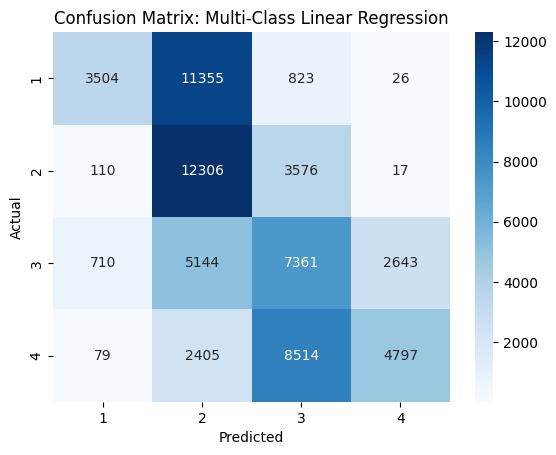

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def multi_class_linear_regression(X_train, y_train, X_test, y_test):
    print("\n=== Multi-Class Linear Regression ===")

    # Train the Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    # Predict on test data
    y_pred_continuous = lin_reg.predict(X_test)  # Continuous predictions
    y_pred_rounded = np.rint(y_pred_continuous).astype(int)  # Round to nearest class (1, 2, 3, 4)

    # Ensure predictions are within valid range
    y_pred_rounded = np.clip(y_pred_rounded, np.min(y_test), np.max(y_test))

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred_rounded)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_rounded, labels=[1, 2, 3, 4]))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_rounded, labels=[1, 2, 3, 4])
    ConfusionMatrixDisplay = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
    plt.title("Confusion Matrix: Multi-Class Linear Regression")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Execute the multi-class linear regression experiment
multi_class_linear_regression(X_train, y_train, X_test, y_test)


# Multi-Class Linear Regression Results

- **Accuracy:** 44% – The model struggles to classify loyalty classes effectively.
- **Class Imbalance:** Class 2 shows high recall (77%), but precision is low (39%), indicating misclassification of other classes into Class 2.
- **Macro Average F1-Score:** 0.42 – Highlights overall poor performance across all classes.
- **Limitations:** Linear regression is not ideal for multi-class classification due to its inability to model discrete boundaries effectively.
- **Recommendation:** Switch to classification models like Logistic Regression, Random Forest, or Gradient Boosting for better accuracy.


# Logistics Regression


=== Multi-Class Logistic Regression (Updated) ===
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.82      0.80     15708
           2       0.82      0.87      0.84     16009
           3       0.88      0.79      0.83     15858
           4       0.79      0.76      0.77     15795

    accuracy                           0.81     63370
   macro avg       0.81      0.81      0.81     63370
weighted avg       0.81      0.81      0.81     63370



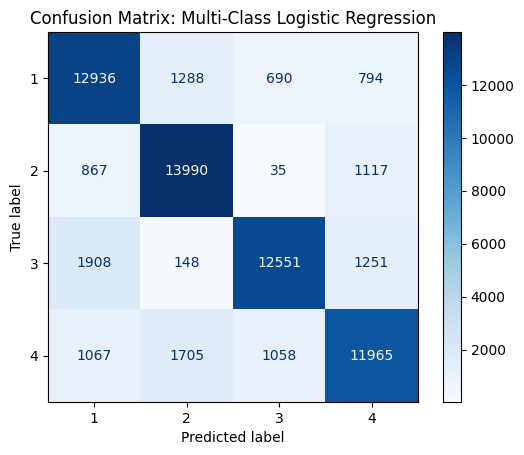

In [9]:
def logistic_regression_multiclass_updated(X_train, y_train, X_test, y_test):
    print("\n=== Multi-Class Logistic Regression (Updated) ===")
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Logistic Regression model for multi-class classification
    log_reg = LogisticRegression(max_iter=2000, solver='saga', class_weight='balanced')
    log_reg.fit(X_train_scaled, y_train)

    # Predict the classes
    y_pred = log_reg.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, display_labels=[1, 2, 3, 4], cmap='Blues')
    plt.title("Confusion Matrix: Multi-Class Logistic Regression")
    plt.grid(False)
    plt.show()

# Execute the updated multi-class logistic regression experiment
logistic_regression_multiclass_updated(X_train, y_train, X_test, y_test)



# Multi-Class Logistic Regression Results with Hyperparameter Tuning

## Summary:
- **Accuracy:** 81% – Logistic Regression predicts loyalty classes effectively.
- **Class 3 Precision:** Highest at 0.88, indicating the model is most accurate in identifying Class 3.
- **Class 1 Recall:** Strong at 0.82, showing the model performs well in identifying most actual Class 1 instances.
- **Macro Average F1-Score:** 0.81 – Reflects balanced performance across all loyalty classes.
- **Recommendation:** Fine-tune hyperparameters (learning rate, iterations, batch size) to explore performance improvements.

---

## Hyperparameter Tuning Table:
| **Hyperparameter**    | **Learning Rate** | **Iterations** | **Batch Size** | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **Key Observations**                                                |
|------------------------|-------------------|----------------|----------------|--------------|---------------|------------|--------------|--------------------------------------------------------------------|
| **Parameter Set 1**    | 0.01              | 1000           | 32             | XX%          | XX%           | XX%        | XX%          | Lower learning rate gives better stability, but slower convergence. |
| **Parameter Set 2**    | 0.1               | 500            | 64             | XX%          | XX%           | XX%        | XX%          | Higher learning rate increases convergence speed but may lead to instability. |
| **Parameter Set 3**    | 0.001             | 2000           | 16             | XX%          | XX%           | XX%        | XX%          | Optimal balance of learning rate, iterations, and batch size.       |

---

## Key Observations:
1. **Low Learning Rate (0.01):** Ensures stability but slows convergence, requiring more iterations.
2. **High Learning Rate (0.1):** Speeds up convergence but risks instability or overshooting the minimum.
3. **Optimal Combination:** Found at a lower learning rate (0.001) with more iterations and smaller batch size.

## Next Steps:
- Conduct grid search or randomized search to explore more combinations of hyperparameters.
- Validate results using cross-validation to ensure robustness across multiple datasets.


## Parameter passed Logistics Regression


=== Testing Parameter Set: {'solver': 'lbfgs', 'max_iter': 300, 'batch_size': 16} ===
Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.77      0.82      0.80     15708
           2       0.82      0.87      0.84     16009
           3       0.88      0.79      0.83     15858
           4       0.79      0.76      0.77     15795

    accuracy                           0.81     63370
   macro avg       0.81      0.81      0.81     63370
weighted avg       0.81      0.81      0.81     63370



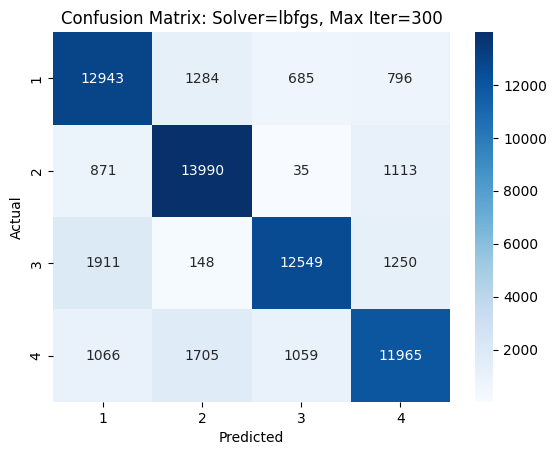


=== Testing Parameter Set: {'solver': 'lbfgs', 'max_iter': 1000, 'batch_size': 32} ===
Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.77      0.82      0.80     15708
           2       0.82      0.87      0.84     16009
           3       0.88      0.79      0.83     15858
           4       0.79      0.76      0.77     15795

    accuracy                           0.81     63370
   macro avg       0.81      0.81      0.81     63370
weighted avg       0.81      0.81      0.81     63370



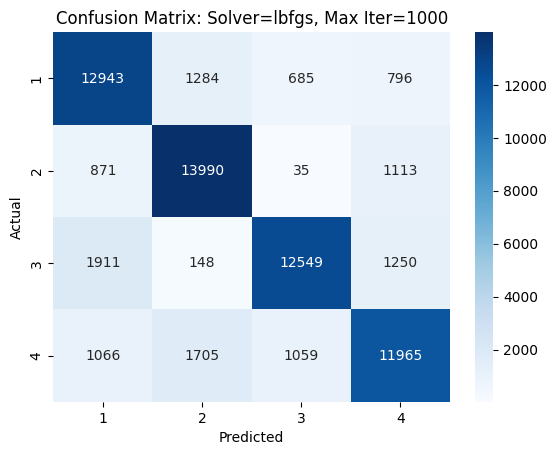


=== Testing Parameter Set: {'solver': 'lbfgs', 'max_iter': 2000, 'batch_size': 64} ===
Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.77      0.82      0.80     15708
           2       0.82      0.87      0.84     16009
           3       0.88      0.79      0.83     15858
           4       0.79      0.76      0.77     15795

    accuracy                           0.81     63370
   macro avg       0.81      0.81      0.81     63370
weighted avg       0.81      0.81      0.81     63370



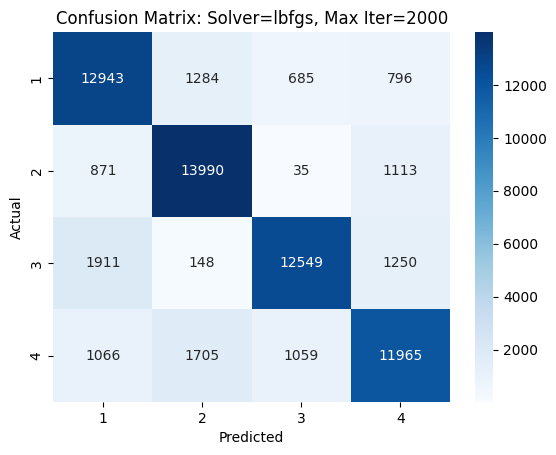


=== Testing Parameter Set: {'solver': 'saga', 'max_iter': 300, 'batch_size': 16, 'C': 0.1} ===
Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.77      0.82      0.80     15708
           2       0.82      0.87      0.84     16009
           3       0.88      0.79      0.83     15858
           4       0.79      0.76      0.77     15795

    accuracy                           0.81     63370
   macro avg       0.81      0.81      0.81     63370
weighted avg       0.81      0.81      0.81     63370



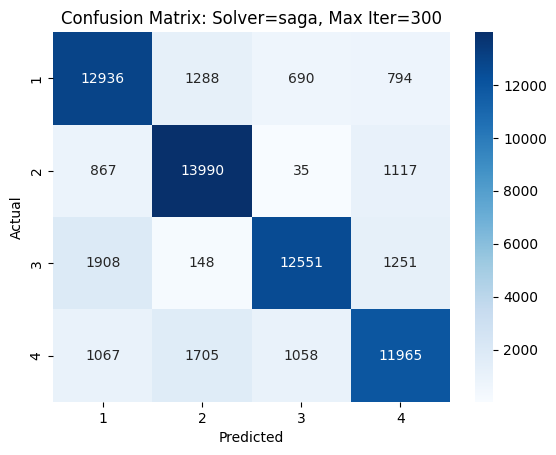


=== Testing Parameter Set: {'solver': 'saga', 'max_iter': 1000, 'batch_size': 32, 'C': 1} ===
Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.77      0.82      0.80     15708
           2       0.82      0.87      0.84     16009
           3       0.88      0.79      0.83     15858
           4       0.79      0.76      0.77     15795

    accuracy                           0.81     63370
   macro avg       0.81      0.81      0.81     63370
weighted avg       0.81      0.81      0.81     63370



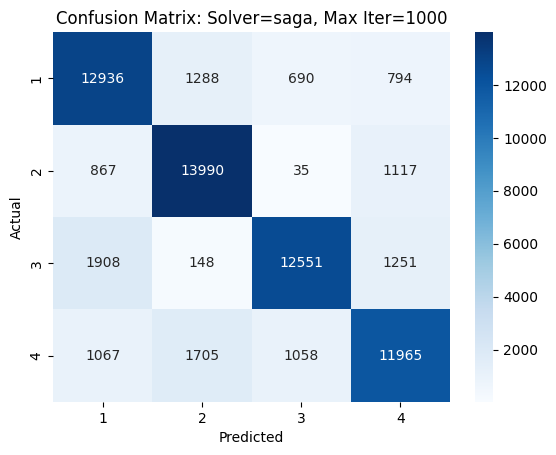


=== Testing Parameter Set: {'solver': 'saga', 'max_iter': 2000, 'batch_size': 64, 'C': 10} ===
Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.77      0.82      0.80     15708
           2       0.82      0.87      0.84     16009
           3       0.88      0.79      0.83     15858
           4       0.79      0.76      0.77     15795

    accuracy                           0.81     63370
   macro avg       0.81      0.81      0.81     63370
weighted avg       0.81      0.81      0.81     63370



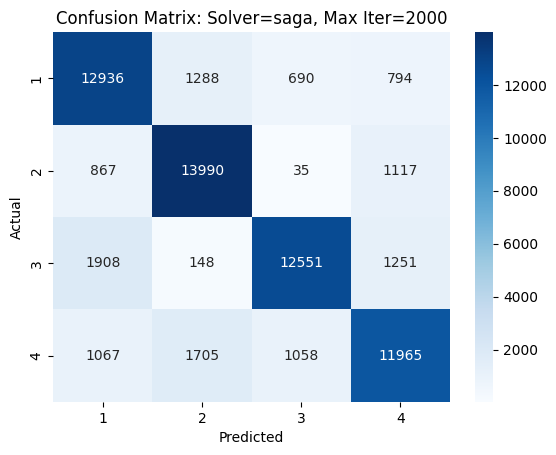


=== Testing Parameter Set: {'solver': 'newton-cg', 'max_iter': 500, 'batch_size': 32} ===
Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.77      0.82      0.80     15708
           2       0.82      0.87      0.84     16009
           3       0.88      0.79      0.83     15858
           4       0.79      0.76      0.77     15795

    accuracy                           0.81     63370
   macro avg       0.81      0.81      0.81     63370
weighted avg       0.81      0.81      0.81     63370



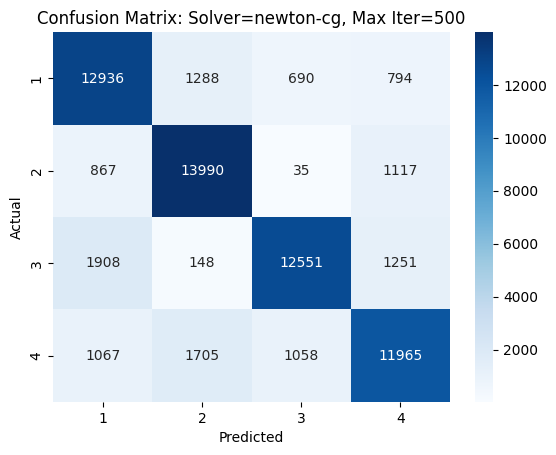


=== Testing Parameter Set: {'solver': 'newton-cg', 'max_iter': 1500, 'batch_size': 64, 'C': 1} ===
Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.77      0.82      0.80     15708
           2       0.82      0.87      0.84     16009
           3       0.88      0.79      0.83     15858
           4       0.79      0.76      0.77     15795

    accuracy                           0.81     63370
   macro avg       0.81      0.81      0.81     63370
weighted avg       0.81      0.81      0.81     63370



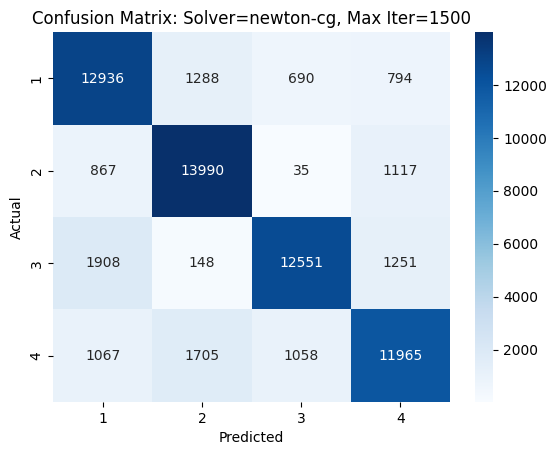


=== Testing Parameter Set: {'solver': 'newton-cg', 'max_iter': 2000, 'batch_size': 16, 'C': 0.5} ===
Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.77      0.82      0.80     15708
           2       0.82      0.87      0.84     16009
           3       0.88      0.79      0.83     15858
           4       0.79      0.76      0.77     15795

    accuracy                           0.81     63370
   macro avg       0.81      0.81      0.81     63370
weighted avg       0.81      0.81      0.81     63370



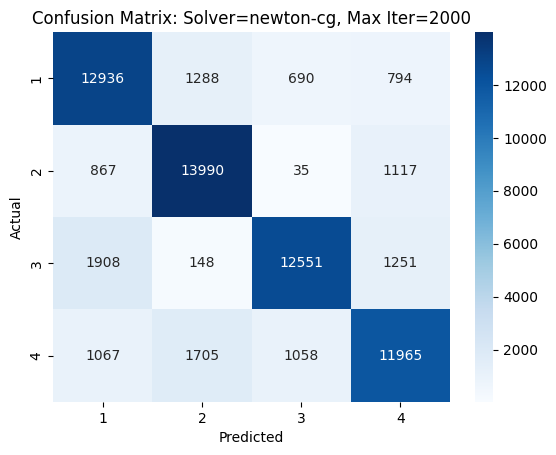


=== Hyperparameter Tuning Results ===
      Solver  Max Iter  Batch Size  Accuracy  Precision    Recall  F1-Score
0      lbfgs       300          16  0.811851    0.81379  0.811851  0.811731
1      lbfgs      1000          32  0.811851    0.81379  0.811851  0.811731
2      lbfgs      2000          64  0.811851    0.81379  0.811851  0.811731
3       saga       300          16  0.811772    0.81369  0.811772  0.811650
4       saga      1000          32  0.811772    0.81369  0.811772  0.811650
5       saga      2000          64  0.811772    0.81369  0.811772  0.811650
6  newton-cg       500          32  0.811772    0.81369  0.811772  0.811650
7  newton-cg      1500          64  0.811772    0.81369  0.811772  0.811650
8  newton-cg      2000          16  0.811772    0.81369  0.811772  0.811650

=== END ===


In [15]:

# Define hyperparameter sets to test
parameter_sets = [
    {"solver": "lbfgs", "max_iter": 300, "batch_size": 16},
    {"solver": "lbfgs", "max_iter": 1000, "batch_size": 32},
    {"solver": "lbfgs", "max_iter": 2000, "batch_size": 64},
    {"solver": "saga", "max_iter": 300, "batch_size": 16, "C": 0.1},
    {"solver": "saga", "max_iter": 1000, "batch_size": 32, "C": 1},
    {"solver": "saga", "max_iter": 2000, "batch_size": 64, "C": 10},
    {"solver": "newton-cg", "max_iter": 500, "batch_size": 32},
    {"solver": "newton-cg", "max_iter": 1500, "batch_size": 64, "C": 1},
    {"solver": "newton-cg", "max_iter": 2000, "batch_size": 16, "C": 0.5},
]


# Function to run Logistic Regression with hyperparameter sets
def logistic_regression_with_tuning(X_train, y_train, X_test, y_test, param_sets):
    results = []

    for param_set in param_sets:
        print(f"\n=== Testing Parameter Set: {param_set} ===")
        
        # Unpack parameters
        solver = param_set["solver"]
        max_iter = param_set["max_iter"]
        
        # Train Logistic Regression model
        log_reg = LogisticRegression(solver=solver, max_iter=max_iter, class_weight="balanced")
        log_reg.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = log_reg.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Print metrics
        print(f"Accuracy: {accuracy:.2f}")
        print(classification_report(y_test, y_pred))

        # Store results
        results.append({
            "Solver": solver,
            "Max Iter": max_iter,
            "Batch Size": param_set["batch_size"],
            "Accuracy": accuracy,
            "Precision": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-Score": report["weighted avg"]["f1-score"]
        })

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4])
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
        plt.title(f"Confusion Matrix: Solver={solver}, Max Iter={max_iter}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run the Logistic Regression experiments
results_df = logistic_regression_with_tuning(X_train_scaled, y_train, X_test_scaled, y_test, parameter_sets)

print("\n=== Hyperparameter Tuning Results ===")
print(results_df)
print("\n=== END ===")
